<a href="https://colab.research.google.com/github/MarlonAdrian/Aprendizaje-no-supervisado/blob/main/No_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.8.2


In [ ]:
#importar dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#El arreglo train_images y train_labels son los arreglos que training(el de entrenamiento) set—el modelo de datos usa para aprender.
#y este modelo es probado con el modelo de prueba(test set): tes_images y test_labels

In [ ]:
#Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de integros, que van del 0 al 9. Estos corresponden a la class de ropa que la imagen representa.


In [ ]:
#Cada imagen es mapeada a una unica etiqueta. Ya que los Class names no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
train_images.shape


(60000, 28, 28)

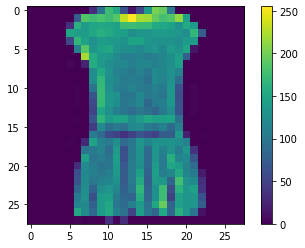

In [ ]:
#imagen de set de entrenamiento 0-255 pixels
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
#Funcion de normalizacion para los datos (Pasar de 0-255 a 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0


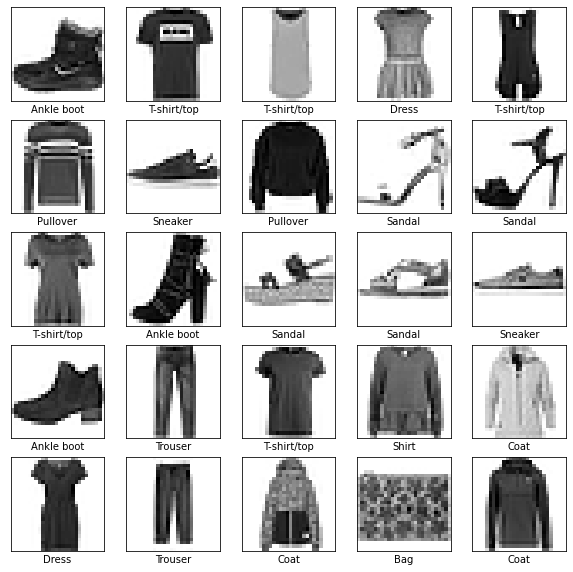

In [ ]:
#verificacion del dataset que esté en un formato adecuado y estén listos para entrenar la red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
#CONSTRUCCION DEL MODELO: construir la red requiere configurar las capas del modelo y luego compliar el modelo
#configuracion de capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#Flatten: reformatea el set de datos.
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]) 


In [ ]:
#COMPILAR EL MODELO

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5009 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3788 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3403 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3146 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2819 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2520 - accuracy: 0.9057
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.242

In [ ]:
#EVALUAR EXATITUD, (Precision) COMPARAR RENDIMIENTO DEL MODELO SOBRE EL SET DE DATOS
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3625 - accuracy: 0.8762 - 509ms/epoch - 2ms/step

Test accuracy: 0.8762000203132629


In [ ]:
#HACER PREDICCIONES
predictions = model.predict(test_images)
predictions[0]


array([4.6984954e-09, 7.6685056e-13, 9.6703409e-12, 1.2197094e-14,
       3.3474781e-09, 8.8590175e-05, 5.8747653e-11, 6.0116057e-03,
       2.7072749e-12, 9.9389982e-01], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
pip install opencv-python


In [ ]:
import cv2 as cv

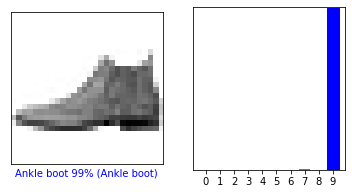

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


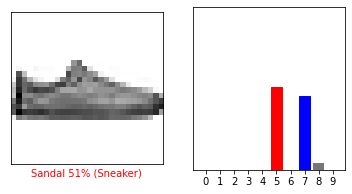

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


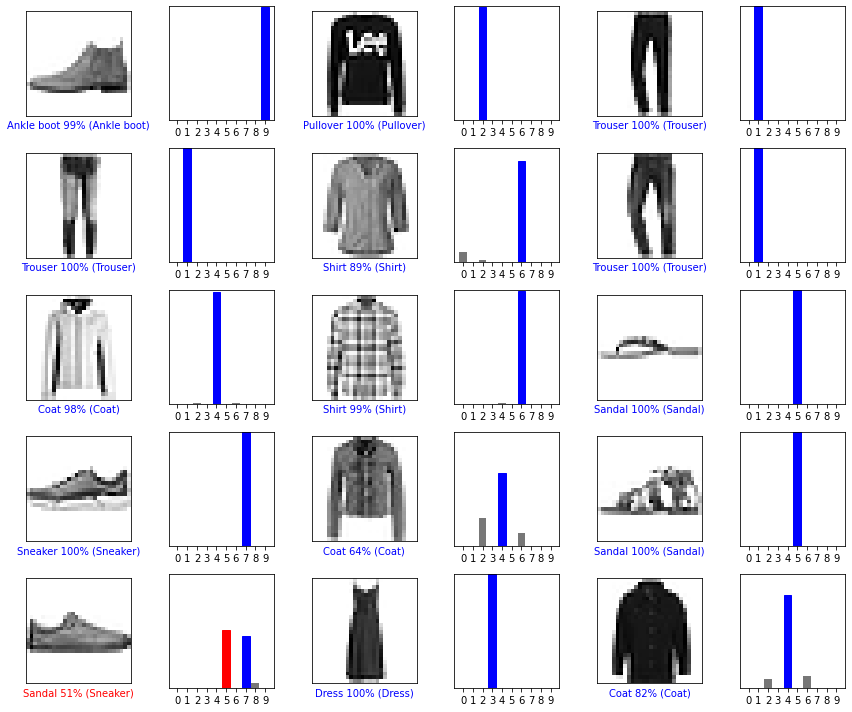

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
